Mean Squared Error: 2.61


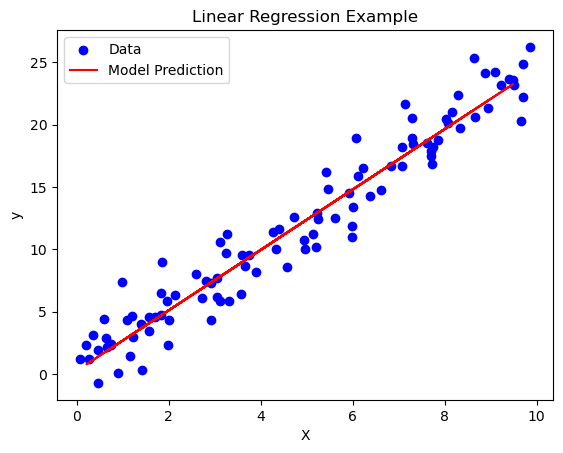

In [4]:
# Install dependencies before running:
# pip install numpy scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate a simple dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features (1D array of random numbers between 0 and 10)
y = 2.5 * X + np.random.randn(100, 1) * 2  # Labels (linear relation with noise)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize the results
plt.scatter(X, y, color="blue", label="Data")  # Original data
plt.plot(X_test, y_pred, color="red", label="Model Prediction")  # Predictions
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()


In [ ]:
# Install necessary libraries:
# pip install tensorflow beautifulsoup4 requests transformers

import tensorflow as tf
from bs4 import BeautifulSoup
import requests
from transformers import pipeline

# Define a function to extract website content
def extract_website_content(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract text content (you can customize this based on the website structure)
        paragraphs = soup.find_all('p')
        content = ' '.join([para.get_text() for para in paragraphs])
        return content
    except Exception as e:
        print(f"Error fetching website content: {e}")
        return None

# Define a function to generate SEO-optimized suggestions
def generate_seo_suggestions(content):
    try:
        # Load a pre-trained text generation pipeline (e.g., GPT-like model)
        generator = pipeline('text2text-generation', model='t5-base')

        # Define a prompt to optimize content for SEO
        prompt = (
            "Optimize the following content for SEO by improving readability, "
            "adding keywords, and enhancing structure: " + content
        )

        # Generate suggestions
        result = generator(prompt, max_length=512, num_return_sequences=1)
        return result[0]['generated_text']
    except Exception as e:
        print(f"Error generating SEO suggestions: {e}")
        return None

if __name__ == "__main__":
    # Input the website URL
    url = input("Enter the website URL: ").strip()

    # Extract website content
    print("Fetching website content...")
    content = extract_website_content(url)

    if content:
        print("Generating SEO suggestions...")
        optimized_content = generate_seo_suggestions(content)

        if optimized_content:
            print("\n--- SEO-Optimized Content ---\n")
            print(optimized_content)
        else:
            print("Failed to generate SEO suggestions.")
    else:
        print("Failed to fetch website content.")
